The available data shows the cost of medical insurance of a person and their details such as age, sex, BMI, a number of insured children, a region where they live and whether they smoke. The aim of this project will be to model a charges variable using other available data.

In [45]:
library(ggplot2)
library(dplyr)

df <- read.csv("insurance.csv", header=TRUE)
head(df)

,age,sex,bmi,children,smoker,region,charges
,<int>,<chr>,<dbl>,<int>,<chr>,<chr>,<dbl>
1,19,female,27.900,0,yes,southwest,16884.924
2,18,male,33.770,1,no,southeast,1725.552
3,28,male,33.000,3,no,southeast,4449.462
4,33,male,22.705,0,no,northwest,21984.471
5,32,male,28.880,0,no,northwest,3866.855
6,31,female,25.740,0,no,southeast,3756.622


Firstly, I am checking how the data looks. 

In [46]:
summary(df)

      age            sex                 bmi           children    
 Min.   :18.00   Length:1338        Min.   :15.96   Min.   :0.000  
 1st Qu.:27.00   Class :character   1st Qu.:26.30   1st Qu.:0.000  
 Median :39.00   Mode  :character   Median :30.40   Median :1.000  
 Mean   :39.21                      Mean   :30.66   Mean   :1.095  
 3rd Qu.:51.00                      3rd Qu.:34.69   3rd Qu.:2.000  
 Max.   :64.00                      Max.   :53.13   Max.   :5.000  
    smoker             region             charges     
 Length:1338        Length:1338        Min.   : 1122  
 Class :character   Class :character   1st Qu.: 4740  
 Mode  :character   Mode  :character   Median : 9382  
                                       Mean   :13270  
                                       3rd Qu.:16640  
                                       Max.   :63770  

In [47]:
any(is.na(df))

[1] FALSE

There is no missing data. 

### Correlation between variables and othe

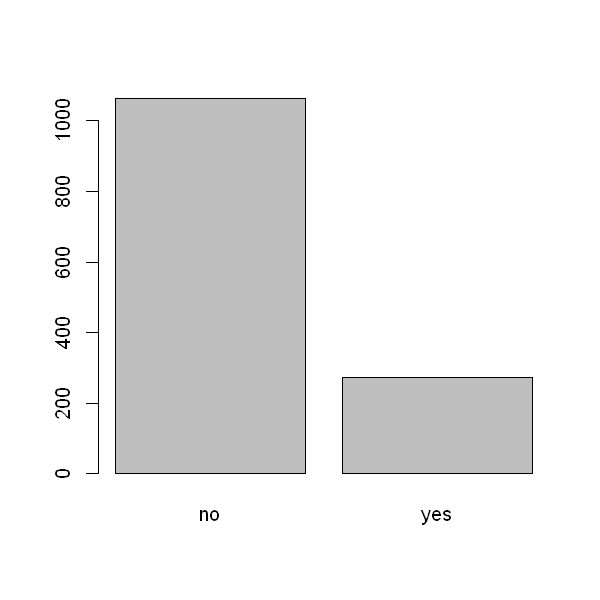

In [48]:
options(repr.plot.width=5, repr.plot.height=5)

df$smoker <- as.factor(df$smoker)
plot(df$smoker)

There is way more non-smokers than smokers.

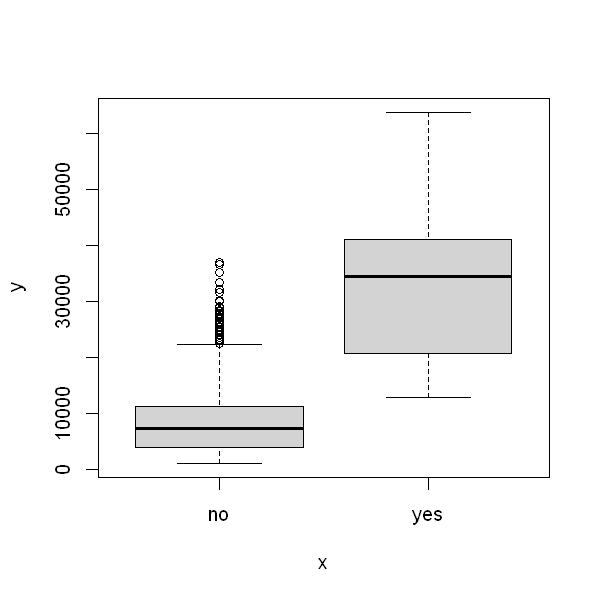

In [49]:
plot(df$smoker, df$charges)

The charges is way higher for smokers.

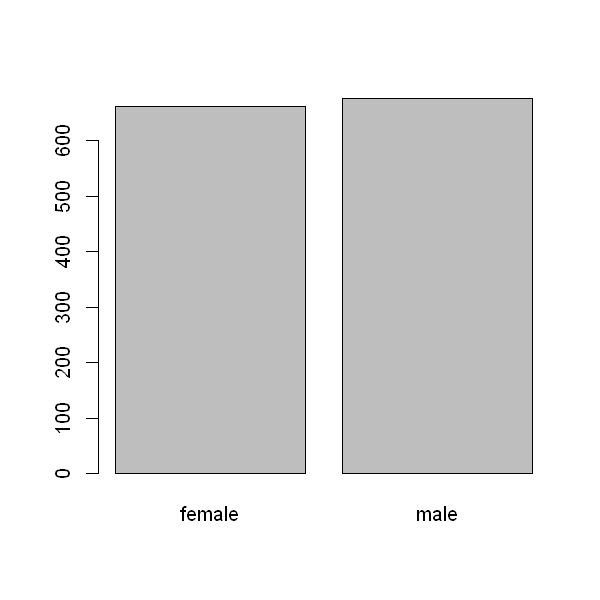

In [50]:
df$sex <- as.factor(df$sex)
plot(df$sex)

There is almost perfect 50/50 representation between sexes.

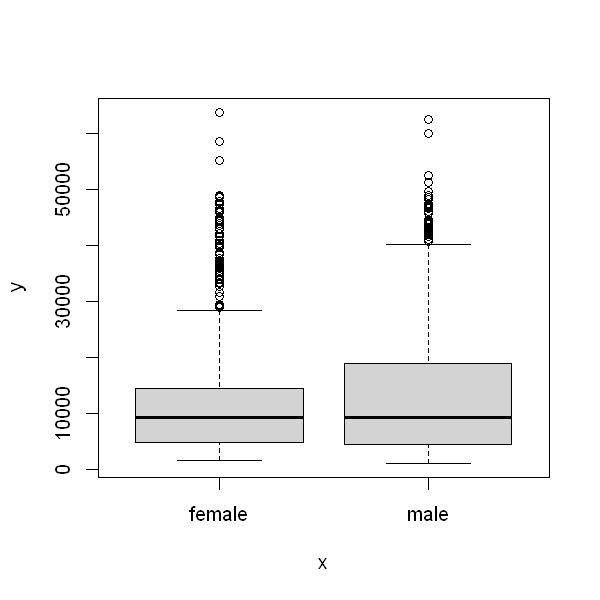

In [51]:
plot(df$sex, df$charges)

Medians for different sexes are on almost the same weight. However, for males the data has bigger 
dispersion. 

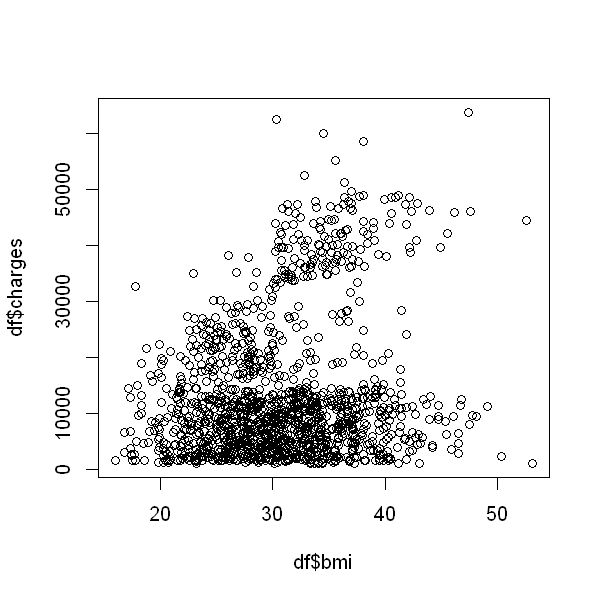

In [52]:
plot(df$bmi, df$charges)

In [53]:
cor(df$bmi, df$charges)

[1] 0.198341

There is no clear correlation between BMI and charges. However, there are some data that is way higher than other points. I check whether it correlates with smokers since this var had the highest differences in charges.

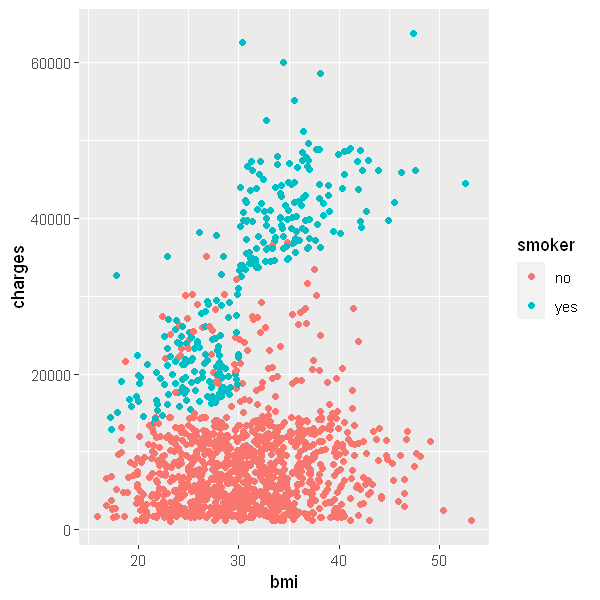

In [54]:
ggplot(df, aes(bmi, charges, color=smoker)) +
    geom_point()

As it can be seen in the plot above - there is a clear division for smokers and non-smokers. It also seems that for smokers BMI might have bigger correlation than for non-smokers.

In [55]:
df %>%
    filter(smoker == 'yes') -> df.smokers

cor(df.smokers$charges, df.smokers$bmi)

[1] 0.8064806

In [56]:
df %>%
    filter(smoker == 'no') -> df.nosmokers

cor(df.nosmokers$charges, df.nosmokers$bmi)

[1] 0.08403654

As you can see, the speculation was proven - for non-smokers correlation between BMI and charges is pretty high (0.8) while for non-smokers it stays pretty low (0.08).

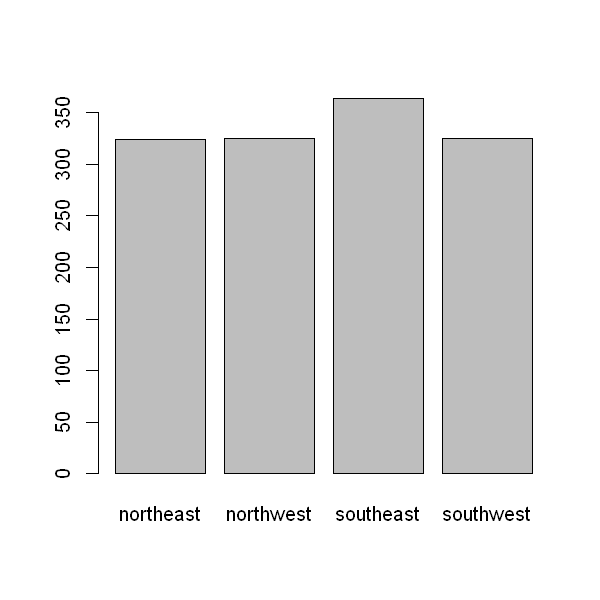

In [57]:
df$region <- as.factor(df$region)
plot(df$region)

In [58]:
table(df$region)


northeast northwest southeast southwest 
      324       325       364       325 

Every region is represented similarly.

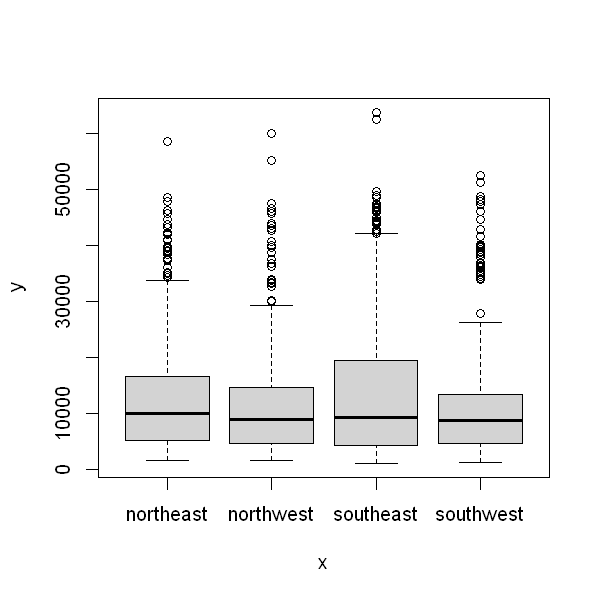

In [59]:
plot(df$region, df$charges)

Medians are really close. However, regions in the east have a higher upper quarter. 

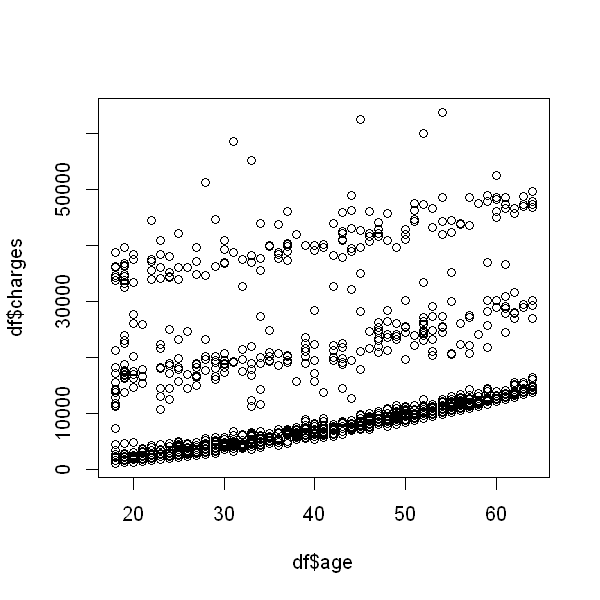

In [60]:
plot(df$age, df$charges)

The plot suggests that there is other variable that seperates age groups into three cost groups. 

In [61]:
cor(df$age, df$charges)

[1] 0.2990082

Correlation is quite low, however, it is probably because the data has three different "levels" as mentioned above.

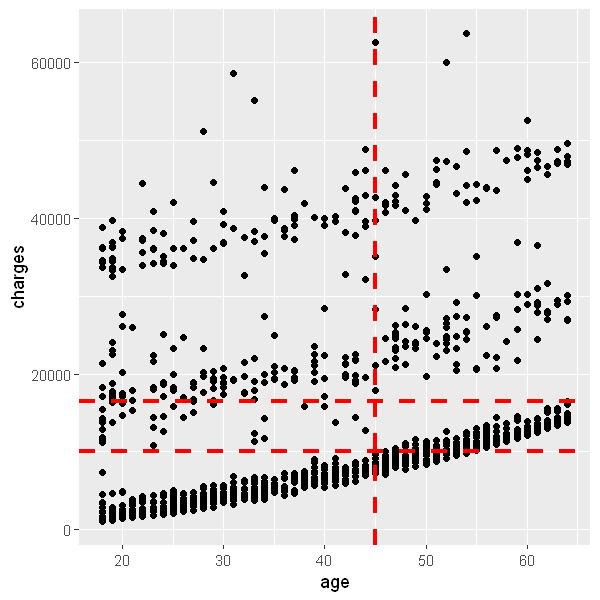

In [62]:
ggplot(df, aes(age, charges)) +
    geom_point() +
    geom_hline(yintercept=10000, linetype="dashed", color = "red", linewidth=1.4) +
    geom_hline(yintercept=16500, linetype="dashed", color = "red", linewidth=1.4) +
    geom_vline(xintercept=45, linetype="dashed", color = "red", linewidth=1.4) 

To investigate it further, I will separate data that has charges above 10000 for people younger than 45 years old and above 16000 for older. 

In [63]:
df %>%
    filter(((charges <= 10000) & (age <= 45)) | ((charges < 16000) & (age > 45))) %>%
    summary()

      age            sex           bmi           children     smoker   
 Min.   :18.00   female:494   Min.   :15.96   Min.   :0.000   no :963  
 1st Qu.:27.00   male  :469   1st Qu.:26.22   1st Qu.:0.000   yes:  0  
 Median :39.00                Median :30.30   Median :1.000            
 Mean   :39.31                Mean   :30.59   Mean   :1.071            
 3rd Qu.:51.00                3rd Qu.:34.40   3rd Qu.:2.000            
 Max.   :64.00                Max.   :53.13   Max.   :5.000            
       region       charges     
 northeast:226   Min.   : 1122  
 northwest:244   1st Qu.: 3596  
 southeast:244   Median : 6666  
 southwest:249   Mean   : 7020  
                 3rd Qu.:10149  
                 Max.   :15612  

In [64]:
df %>%
    filter(((charges > 10000) & (age <= 45)) | ((charges > 16000) & (age > 45))) %>%
    summary()

      age            sex           bmi           children     smoker   
 Min.   :18.00   female:168   Min.   :17.20   Min.   :0.000   no :101  
 1st Qu.:26.50   male  :207   1st Qu.:26.50   1st Qu.:0.000   yes:274  
 Median :39.00                Median :30.59   Median :1.000            
 Mean   :38.94                Mean   :30.84   Mean   :1.157            
 3rd Qu.:51.00                3rd Qu.:35.30   3rd Qu.:2.000            
 Max.   :64.00                Max.   :52.58   Max.   :5.000            
       region       charges     
 northeast: 98   Min.   :10796  
 northwest: 81   1st Qu.:19531  
 southeast:120   Median :26392  
 southwest: 76   Mean   :29323  
                 3rd Qu.:38770  
                 Max.   :63770  

As you can see, most of the non-smokers are on the lower trend. It suggests that this trend might be explained by smoker variable. The distribution of other variables (such as BMI) looks similar in both groups. There is more people from southeast but it might be explained by their overrepresentation in the data.

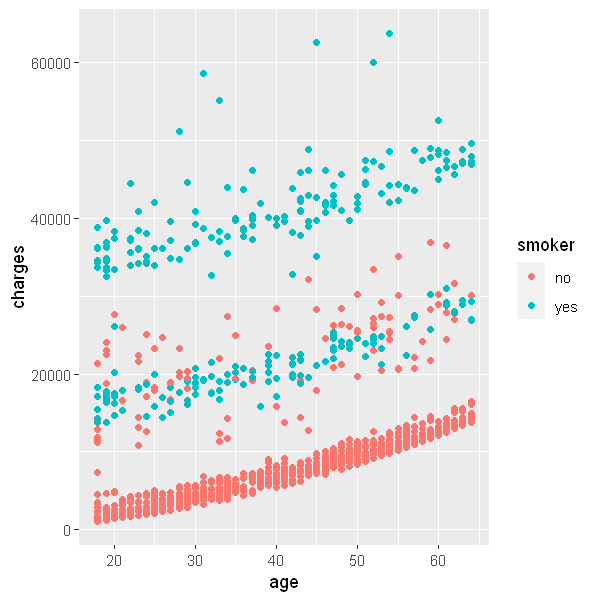

In [65]:
ggplot(df, aes(age, charges, color=smoker)) +
    geom_point()

The highest trend line has only smokers.

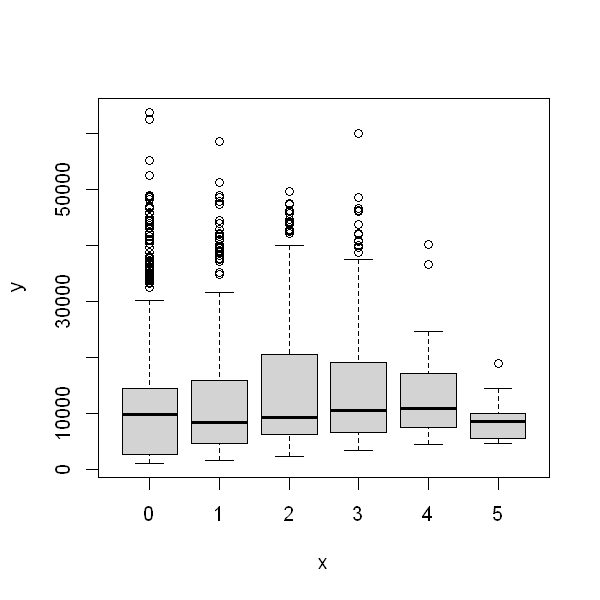

In [66]:
plot(as.factor(df$children), df$charges)

There is an overrepresentation of people without children based on summary done earlier. Medians are similiar to each other.

In [67]:
cor(df$children, df$charges)

[1] 0.06799823

The correlation is low.

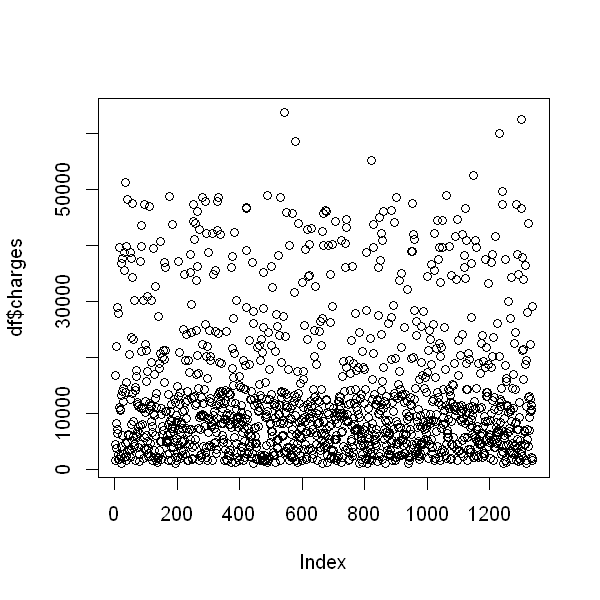

In [68]:
plot(df$charges)

There is an overrepresentation of lower number of charges.

### Models

While investigating the data, the conclusion was that the variables with highest correlations are smoker, age and BMI. Mainly, the interaction between smoker var and other vars (BMI and age). That's why the first model was the interaction model.

In [69]:
model.interaction <- lm(charges~age*smoker*bmi, data=df)
summary(model.interaction)


Call:
lm(formula = charges ~ age * smoker * bmi, data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-12153.0  -2013.3  -1338.7   -303.7  29393.3 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)       -1.483e+03  2.240e+03  -0.662   0.5079    
age                2.458e+02  5.502e+01   4.468 8.58e-06 ***
smokeryes         -1.242e+04  4.963e+03  -2.502   0.0125 *  
bmi               -1.943e+01  7.234e+01  -0.269   0.7883    
age:smokeryes     -2.068e+02  1.252e+02  -1.653   0.0987 .  
age:bmi            6.835e-01  1.750e+00   0.391   0.6961    
smokeryes:bmi      1.184e+03  1.583e+02   7.481 1.34e-13 ***
age:smokeryes:bmi  6.624e+00  3.956e+00   1.674   0.0943 .  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 4905 on 1330 degrees of freedom
Multiple R-squared:  0.8368,	Adjusted R-squared:  0.836 
F-statistic: 974.3 on 7 and 1330 DF,  p-value: < 2.2e-16


The R2 was quite high (0.836)

In [70]:
step(model.interaction, trace=0)


Call:
lm(formula = charges ~ age * smoker * bmi, data = df)

Coefficients:
      (Intercept)                age          smokeryes                bmi  
       -1.483e+03          2.458e+02         -1.242e+04         -1.943e+01  
    age:smokeryes            age:bmi      smokeryes:bmi  age:smokeryes:bmi  
       -2.068e+02          6.835e-01          1.184e+03          6.624e+00  


Even though, some of the coefficients got high p-value (for example BMI and age:BMI), the step model didn't reduce them. It suggests that even though they have high p-value, they might be still important in overall model.

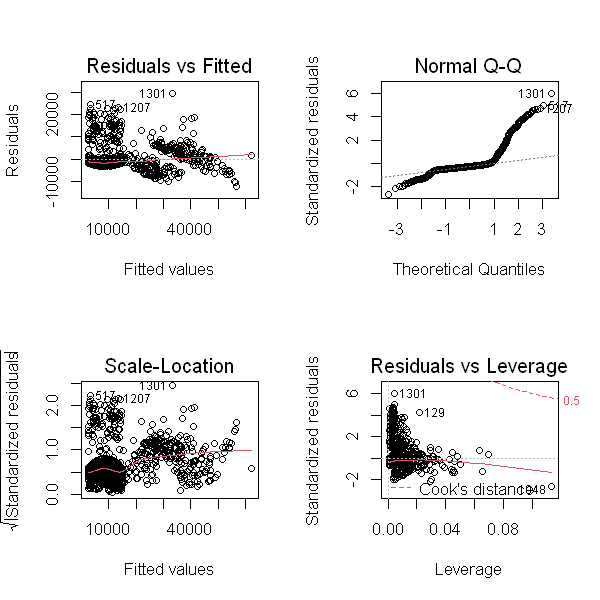

In [71]:
par(mfrow = c(2, 2))
plot(model.interaction)

The diagnostic plots doesn't look the best - it looks like the data is split into groups (residuals vs fitted and scale-location). Q-Q plot also is not a straight line.

Now, I create a model that uses all data points for comparision.

In [72]:
model.all <- lm(charges~., data=df)
summary(model.all)


Call:
lm(formula = charges ~ ., data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-11304.9  -2848.1   -982.1   1393.9  29992.8 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)     -11938.5      987.8 -12.086  < 2e-16 ***
age                256.9       11.9  21.587  < 2e-16 ***
sexmale           -131.3      332.9  -0.394 0.693348    
bmi                339.2       28.6  11.860  < 2e-16 ***
children           475.5      137.8   3.451 0.000577 ***
smokeryes        23848.5      413.1  57.723  < 2e-16 ***
regionnorthwest   -353.0      476.3  -0.741 0.458769    
regionsoutheast  -1035.0      478.7  -2.162 0.030782 *  
regionsouthwest   -960.0      477.9  -2.009 0.044765 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 6062 on 1329 degrees of freedom
Multiple R-squared:  0.7509,	Adjusted R-squared:  0.7494 
F-statistic: 500.8 on 8 and 1329 DF,  p-value: < 2.2e-16


Most of the coefficients have sufficient p-value (except northwest and sex). However, R2 is lower than for the previous model (0.75).

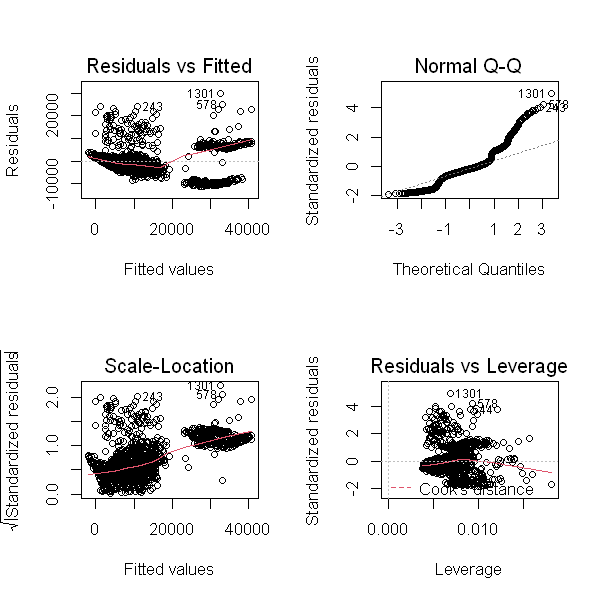

In [73]:
par(mfrow = c(2, 2))
plot(model.all)

The diagnostic models are similiar to the previous one.

In [74]:
model.step <- step(model.all, trace=0)
summary(model.step)


Call:
lm(formula = charges ~ age + bmi + children + smoker + region, 
    data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-11367.2  -2835.4   -979.7   1361.9  29935.5 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)     -11990.27     978.76 -12.250  < 2e-16 ***
age                256.97      11.89  21.610  < 2e-16 ***
bmi                338.66      28.56  11.858  < 2e-16 ***
children           474.57     137.74   3.445 0.000588 ***
smokeryes        23836.30     411.86  57.875  < 2e-16 ***
regionnorthwest   -352.18     476.12  -0.740 0.459618    
regionsoutheast  -1034.36     478.54  -2.162 0.030834 *  
regionsouthwest   -959.37     477.78  -2.008 0.044846 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 6060 on 1330 degrees of freedom
Multiple R-squared:  0.7509,	Adjusted R-squared:  0.7496 
F-statistic: 572.7 on 7 and 1330 DF,  p-value: < 2.2e-16


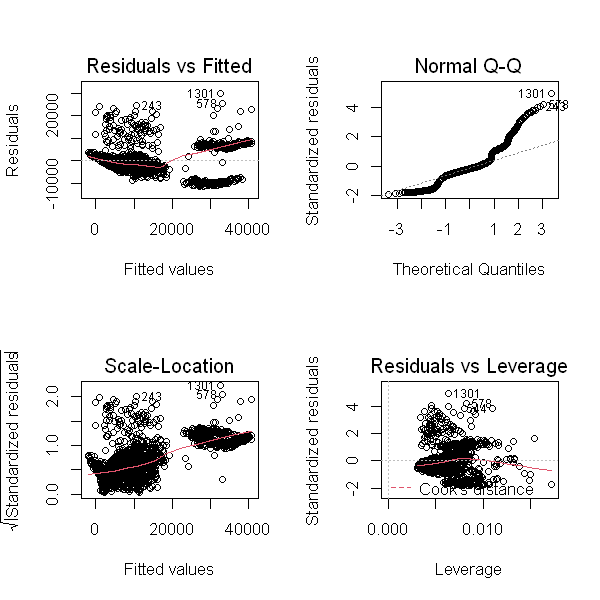

In [75]:
par(mfrow = c(2, 2))
plot(model.step)

The reduced model doesn't have as high R2 as interaction model.

In [76]:
anova(model.all, model.step, test="LRT")

,Res.Df,RSS,Df,Sum of Sq,Pr(>Chi)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1329,48839532844,NA,NA,NA
2,1330,48845249273,-1,-5716429,0.6932842


The model after reduction using step doesn't have data about sex. ANOVA proves that even without this coeff the model is pretty much the same.

Comparing all of the models above:

In [77]:
library(MASS)
AIC(model.interaction); AIC(model.all); AIC(model.step)

[1] 26547.63

[1] 27115.51

[1] 27113.66

As seen above, model with interaction got the lower AIC value which further proves that it is the best model created so far in this project. It has the highest R2 and the lowest AIC.

Are there any influencial observations or outliers for this model?

,StudRes,Hat,CookD
,<dbl>,<dbl>,<dbl>
129,4.2616060,0.021828183,0.050013942
517,5.0517727,0.004697378,0.014783049
544,0.3456261,0.069563541,0.001117135
1048,-2.6375784,0.113552310,0.110897782
1301,6.0872129,0.004527129,0.020508042


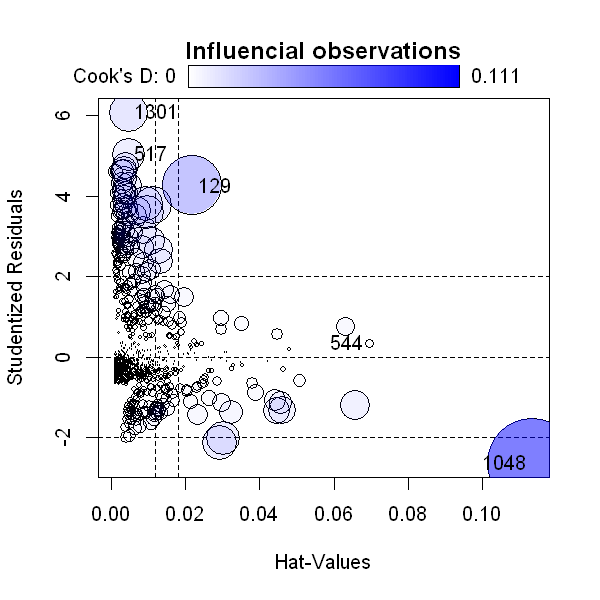

In [78]:
library(car)
influencePlot(model.interaction,
              main="Influencial observations")

Using Crook distance it looks like there are 5 influencial observations.

Are there any outliers?

In [79]:
outlierTest(model.interaction)

     rstudent unadjusted p-value Bonferroni p
1301 6.087213         1.5008e-09   2.0081e-06
517  5.051773         4.9867e-07   6.6721e-04
1207 4.769968         2.0458e-06   2.7373e-03
243  4.659120         3.4944e-06   4.6755e-03
1020 4.630741         4.0005e-06   5.3527e-03
937  4.616630         4.2776e-06   5.7235e-03
1013 4.594493         4.7498e-06   6.3553e-03
600  4.436031         9.9200e-06   1.3273e-02
527  4.330710         1.5979e-05   2.1380e-02
220  4.264644         2.1438e-05   2.8684e-02

The test suggest that there might be 10 outliers.

### Summary
From achieved models, it looks like the cost of insurance can be explained the best using interaction between BMI, age and whether they are a smoker. It seems also that data about a region, children or sex doesn't have a significant importance in models' performance. 
The model might have been more accurate if there were more data about higher values of charges. The overrepresentation of lower values of charges might influence the model's ability to correctly predict the highest values.